# Simple Linear Regression

In this R Jupyter notebook, we go through the code implementation for a simple linear regression analysis. In particular, we are interested in whether we can explain or predict midterm 2 scores by midterm 1 scores.

## 1. Loading the data

If the data size is not large, it may be convenient to make two data vectors manually as follows.

In [1]:
midterm1 <- c(23, 22.5, 21.5, 21.25, 13, 25, 14.5, 20, 18, 18, 19.5, 
              25, 23, 19, 24, 20, 24, 24, 18.5, 18, 16, 21.85, 25, 19.5) # explanatory variable
midterm2 <- c(21.5, 20, 21, 21.32, 12.7, 25, 18.5, 24, 15.5, 18, 23, 23, 
              17.9, 13.5, 22, 22.5, 21.5, 18.5, 18.5, 20, 17.5, 20.5, 16.5, 20) # response variable

If the data size is not small enough for a manual input, we have to load the data. The following is an example of loading the data "data.csv" from my desktop folder. The data file "midterm.csv" contains two columns as follows.

<img src="data.png" width="150" />

Note that the first row starts with the variable names. This feature will be important later. 

Since this data file is in the desktop folder, we have to set up a working directory where the data file exists.

In [2]:
setwd("~/Desktop/")

For Window users, the following code will be useful.

setwd("C:/Users/hyungsuktak/Desktop/")

Now let us load the data in the desktop folder.

In [3]:
midterm <- read.csv("midterm.csv", header = TRUE)

The first argument must be the file name, and the next argument "header = TRUE" is to tell R that the first row of the data file contains the variable names. If the data file is a .txt file, then the following code will be used instead.

midterm <- read.table("midterm.txt", header = TRUE)

To see the data, type the object name.

In [4]:
midterm

midterm1,midterm2
<dbl>,<dbl>
23.00,21.50
22.50,20.00
21.50,21.00
21.25,21.32
13.00,12.70
25.00,25.00
14.50,18.50
20.00,24.00
18.00,15.50


To avoid a mistake, it is better to check whether the first row is correctly loaded.
 
Next, we designate each column of the data to two objects, midterm1 and midterm2, as we input manually in the beginning.

In [5]:
midterm1 <- midterm[, 1]
midterm2 <- midterm[, 2]

The bracket [, 1] above can be interpreted as "all rows in the first column", and [, 2] as "all rows in the second column.

This is the end of loading the data, and we are ready to conduct a simple regression analysis.

## 2. Visualizing the data

In a simple regression analysis, the most important plot is a scatter plot of $Y$ on $X$. In R, the plot can be drawn as follows.

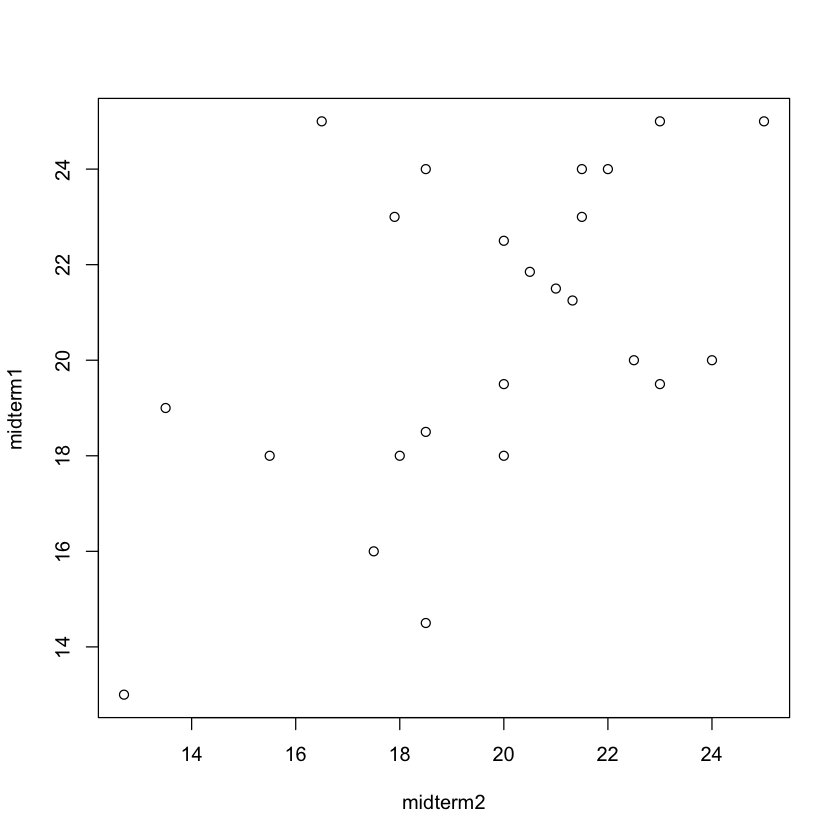

In [6]:
plot(midterm2, midterm1)

The variable in the first argument is used to represent the vertical axis, and the one in the second argument is to denote the horizontal axis. This plot may reveal whether a linear relationship exists in the data, i.e., whether we can draw a linear line that may explain their pattern. Roughly speaking, we can say there exists a linear relationship if $Y$ tend to increase when $X$ increases (positive trend) or when $X$ decreases (negative trend).

## 3. Fitting a simple linear regression model

A linear pattern identified in the scatter plot justifies using a simple linear regression model. 

In [7]:
res <- lm(midterm2 ~ midterm1)

The code above fits the following linear regression model and saves the fitting result in the object "res":

$$
Y_i=\beta_0+\beta_1x_i+\epsilon_i,~~\epsilon_i\stackrel{\textrm{iid}}{\sim}N(0, \sigma^2)
$$

where $Y_i$ and $x_i$ are the $i$-th person's midterm 1 and 2 scores, respectively.

To see the fitting result, type the following code.

In [8]:
summary(res)


Call:
lm(formula = midterm2 ~ midterm1)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4014 -1.1872  0.4097  1.3798  4.6055 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   9.5323     3.5192   2.709  0.01283 * 
midterm1      0.4931     0.1688   2.921  0.00791 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.707 on 22 degrees of freedom
Multiple R-squared:  0.2794,	Adjusted R-squared:  0.2467 
F-statistic: 8.532 on 1 and 22 DF,  p-value: 0.007914


First of all, the proposed model is significant at the 5% significance level ($\alpha=0.05$) based on the F-test result on the bottom ($p$-value $=$ 0.007914 $<$ 0.05). 

The model explains 27.94% of the midterm2 variability, considering the value of $R^2$. This will be enough for a simple linear regression. In a multiple linear regression setting, however, one disadvantage of $R^2$ is that it always increases even when useless exploratory variables are added in the model. The adjusted $R^2$ is designed not to increase when useless exploratory variables are added to the model by additioally accounting for the number of exploratory variables. 

At $\alpha=0.05$, both intercept $\beta_0$ and slope $\beta_1$ are significantly different from zero based on their $t$-tests; both $p$-values (0.01283 and 0.00791) are smaller than $\alpha=0.05$. We interpret $\hat{\beta}_1$ as an average change of the midterm 2 score with a unit increase in midterm 1 score. That is, the average midterm 2 score increases by 0.4931 for every additional one point in the midterm 1 score.

## 4. Diagnosing the fitted model

It is always desirable to diagnose the fitted model to see whether the proposed model is supported by the data. The key assumptions of the linear regression model are represented in the error terms.

$$
\epsilon_i\stackrel{\textrm{iid}}{\sim}N(0, \sigma^2)
$$

That means, we assume (1) independence among the measurements, (2) linearity (i.e., $E(\epsilon_i)=0$), (3) Normality, and (4) constant variance (i.e., $Var(\epsilon_i)=\sigma^2$ for all $i$). The following code is mainly used for a model check in R.

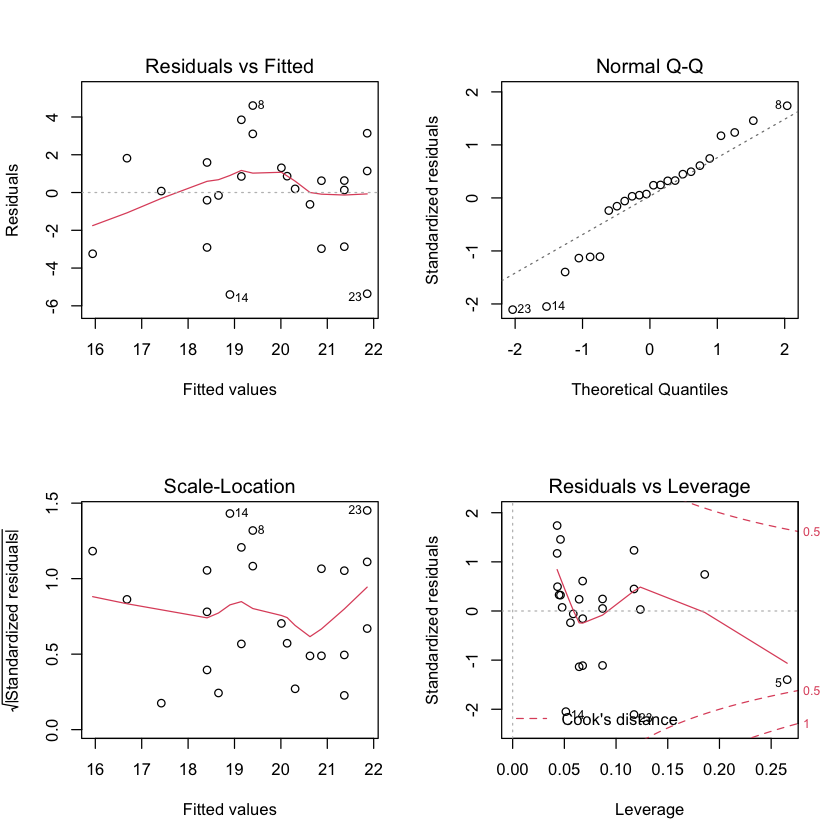

In [9]:
par(mfrow = c(2, 2))
plot(res)

The function "par" adjust the plot setting. The first argument "mfrow = c(2, 2)" tells R to divide the plot into 2 by 2 panels, and to fill out each panel row by row (the first row with two panels will be used first, and then next row with two panels will be filled out).


The function "plot(res)" returns four plots (which will be displayed in the 2 by 2 panels); a residual plot (top-left, residuals over fitted values), QQ-plot (top-right), scale-location plot (bottom-left), and a plot for checking influence of each observation (bottom-right, Cook's D over leverage).

The residual plot on the top-left panel is mainly used to check the independence and linearity. If there is no clear pattern in this plot, such as quadratic  or other non-linear patterns, then we consider that the two assumptions are satisfactorily met.

The QQ-plot on the top-right panel can be used to check the Normality. If dots are on closely plotted on the dotted line, we can conclude that the residuals are Normally distributed. Note that the dots below (above) the dotted line on the smaller theoretical quantiles imply that the residual distribution has a fat (thin) left tail, and those above (below) the dotted line on the larger theoretical quantiles mean that the residual distribution has a fat (thin) right tail.

The scale-location plot is used to check the constant variance. If the dots are evenly spread in horizontal boundaries (without any evidence of increasing or decreasing spread), then we consider it as evidence of constant variance.

The last plot shows whether there are influential observations that unduly affect the paramter estimation. Any dots outside the boundary of 0.5 or of 1 will be considered as influential observations. Removing these will significantly change the fitting results. 
